In [16]:
from qiskit import QuantumRegister, ClassicalRegister, execute
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit_ibm_runtime import QiskitRuntimeService, Options
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import plot_state_city
from qiskit.tools.monitor import job_monitor
import matplotlib.pyplot as plt

IBMQ.load_account()

ibmqfactory.load_account:WARNING:2024-01-09 13:21:47,976: Credentials are already in use. The existing account in the session will be replaced.


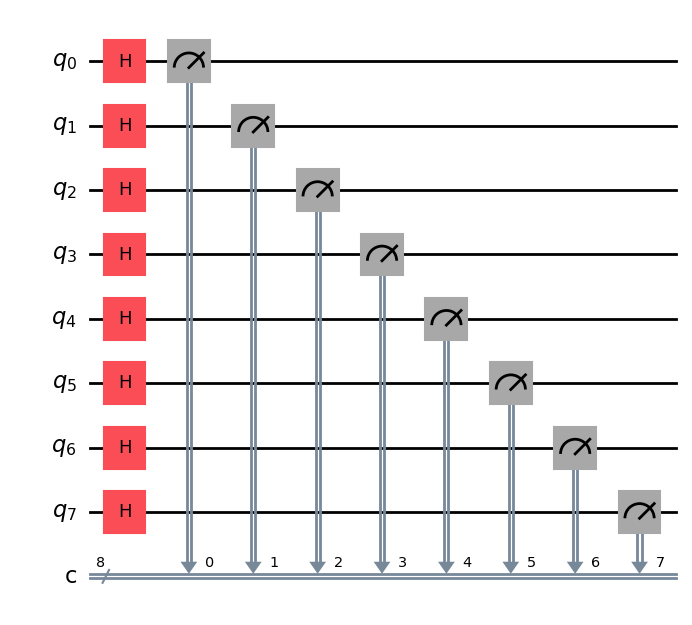

In [11]:
qr = QuantumRegister(8, 'q') # 8 quantum bit registers
cr = ClassicalRegister(8, 'c') # 8 classical bit registers

circuit = QuantumCircuit(qr, cr)

# apply Hadamard gate to all qubits so that they are in superposition with 50% chance of |0> or |1>
circuit.h(qr)

# measure all qubits and store the result in classical bits
circuit.measure(qr, cr)
circuit.draw(output='mpl', scale=1, style="iqp")

In [85]:
backend = Aer.get_backend('qasm_simulator')
simResult = execute(circuit, backend, shots=1000, memory=True).result()

rawvalues_sim = simResult.get_memory()

for i in range(0, len(rawvalues_sim)):
    rawvalues_sim[i] = int(rawvalues_sim[i], 2)
    #print(rawvalues_sim[i])

(array([27., 23., 20., 13., 23., 14., 25., 25., 17., 22., 19., 20., 19.,
        15., 13., 24., 21., 17., 30., 20., 26., 26., 21., 23., 16., 17.,
        16., 16., 17., 15., 25., 25., 28., 12., 27., 15., 10., 21., 23.,
        16., 23., 20., 16., 24., 13., 15., 13., 23., 19., 32.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <BarContainer object of 50 artists>)

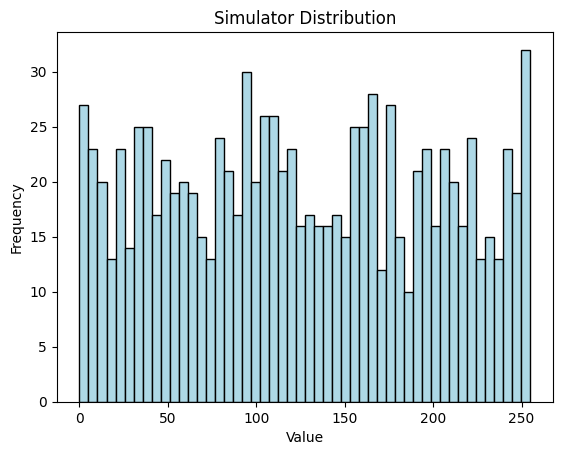

In [84]:
plt.title('Simulator Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.hist(rawvalues_sim,color='lightblue', ec='black', bins=50)

In [67]:
service = QiskitRuntimeService()
 
# Run on the least-busy backend you have access to
qbackend = service.least_busy(simulator=False, operational=True)
options = Options()
options.resilience_level = 1
options.optimization_level = 3

job = execute(circuit, backend=qbackend, shots=1000, memory=True)
# Once the job is complete, get the result
job.result()

Result(backend_name='ibm_osaka', backend_version='0.0.0', qobj_id='Unknown', job_id='circuit-runner_cmeqecktou086ro7b0q0_398f_0', success=True, results=[ExperimentResult(shots=1000, success=True, meas_level=2, data=ExperimentResultData(counts={'0xc6': 2, '0x70': 4, '0x30': 2, '0x84': 3, '0xcd': 6, '0x14': 3, '0xaa': 4, '0x7b': 2, '0x2': 7, '0x64': 3, '0x3b': 8, '0x63': 2, '0xea': 6, '0x9a': 1, '0xd1': 5, '0xd7': 4, '0x99': 1, '0x1f': 2, '0x9e': 3, '0x65': 7, '0x1b': 4, '0xab': 5, '0x80': 2, '0x7f': 7, '0x6c': 5, '0xa3': 3, '0x38': 6, '0x13': 1, '0xbe': 5, '0xa9': 5, '0x37': 4, '0x17': 4, '0x76': 3, '0xac': 5, '0xbb': 4, '0xf4': 3, '0x9b': 5, '0x8c': 5, '0xae': 5, '0xe9': 4, '0x69': 2, '0x91': 6, '0xfa': 4, '0xff': 3, '0xc2': 6, '0x2d': 2, '0xe8': 3, '0xf': 5, '0xb8': 4, '0xe1': 8, '0xdc': 2, '0xd3': 5, '0xc3': 4, '0x7a': 3, '0x15': 4, '0x7': 4, '0x7e': 2, '0x47': 4, '0x62': 4, '0xbf': 3, '0x5d': 5, '0x85': 3, '0xc5': 10, '0xb5': 5, '0xdf': 6, '0x8': 5, '0x56': 4, '0x22': 2, '0x8e': 6, 

In [86]:
rawvalues_ibmq = job.result().get_memory()

for i in range(0, len(rawvalues_ibmq)):
    rawvalues_ibmq[i] = int(rawvalues_ibmq[i], 2)
    #print(rawvalues_ibmq[i])

(array([30., 23., 23., 22., 25., 22., 13., 23., 21., 19., 22., 24.,  9.,
        18., 20., 18., 30., 22., 16., 18., 16., 21., 21., 19., 18.,  9.,
        14., 21., 17., 17., 12., 13., 25., 24., 18., 17., 20., 14., 28.,
        27., 28., 17., 26., 19., 26., 18., 20., 17., 20., 20.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <BarContainer object of 50 artists>)

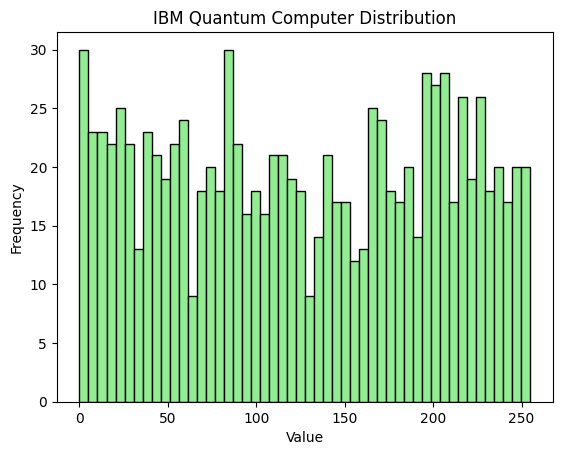

In [71]:
plt.title('IBM Quantum Computer Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.hist(rawvalues_ibmq,color='lightgreen', ec='black', bins=50)